In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import convolve
import sys
import os
from burst_utils import find_burst, boxcar_kernel
from profile_fits_final_utils import *
import csv
MIN_FLOAT = sys.float_info[3]

#FORMATTING
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [3]:
pfits_dict = pfits_dict()
pfits_dict = pfits_dict[0]
print(pfits_dict)

{'gbta': [14.21, 0.83, 1.22, 1.35, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gbtb': [7.33, 0.62, 0.88, 1.11, 7.83, 0.37, 1.02, 0.71, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gbtc': [56.78, 1.23, 3.63, 2.8, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gbtd': [29.01, 0.83, 1.29, 1.45, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gbte': [2.73, 0.84, 0.73, 0.33, 3.85, 0.71, 0.52, 0.88, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gbtf': [15.25, 0.54, 2.54, 0.6, 14.64, 0.36, 0.81, 3.86, 11.54, 0.21, 0.12, 1.27, 13.95, 0.15, 0.04, 0.66], 'gbtg': [16.97, 0.6, 1.38, 0.6, 16.28, 0.74, 1.84, 2.33, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gmrta': [26.14, 0.67, 2.75, 0.56, 26.03, 0.71, 2.37, 3.43, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], 'gmrtb': [11.43, 0.88, 1.09, 3.01, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001

# Archive File & Burst Info

In [4]:
#Set relevant burst index
idx = 2 #Order: GBT A - 0, B - 1, C - 2, D - 3, E - 4, F - 5, G - 6, GMRT A - 7, B - 8, C - 9, D - 10

#Get info
npy_fils = burst_info(idx)

Burst:  gbtc
Bandwidth (MHz):  400.0
Center Frequency (MHz):  800.0
File Duration (ms):  333.33
Sampling Time (ms):  2.604140625
Number of Samples:  128
Number of Channels:  128
Peak Location (grid):  94
Peak Width (grid):  2
Raw Time Resolution (microsec):  2604.140625
Window (left):  72
Window (right):  116


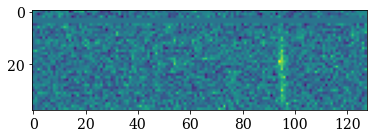

In [11]:
im = np.load('prepped_arrays/scrunch/GBT_C_348.8_scrunch16_dt0.0026044159999999974sec_fchan128_bins128.npy')
plt.imshow(im[80:-10, :])
plt.show()

ar = np.load("prepped_arrays/scrunch/GBT_A_348.8_scrunch16_dt0.0006511199999999994sec_fchan192_bins128.npy")
plt.plot(ar.sum(0)[64:104])

# Nested Sampling Fits & Burst Widths

Burst:  gbtc
Archive File Duration (ms):  333.33
Bandwidth (MHz):  400.0
Sigmas:  3.63 0.001 0.001 0.001
gbtc width (ms): 8.56 +/- 0.39
gbtc width (ms): 8.55 +/- 0.39
[ 0.07335806  0.20100267  0.37953818  0.19648103  0.30278596  0.2752096
  0.26607466 -0.14276013 -0.16272962  0.10941826 -0.1239036   0.15081733
 -0.15296514 -0.06070581  0.20705153  0.05948002  0.41934583  0.14406924
  0.19424073  0.1446278   0.16945055  0.15102534  0.64936846  1.
  0.47724015  0.49060026 -0.09687459 -0.04299586  0.08208104  0.20017716
  0.12930946  0.37764323 -0.00341627  0.188826    0.06912506  0.22778848
 -0.06833276  0.17132315 -0.0850694   0.19886282 -0.11365365  0.02213186
  0.07509014  0.19717681]


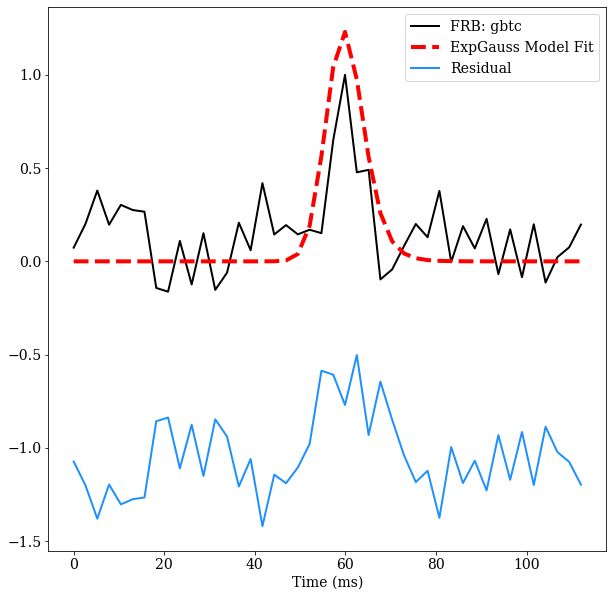

In [5]:
#Plot relevant burst info for nested sampling fits
#Plot timeseries, model & residual
#for idx in range(2):
#idx = 0
x, y, y_data, pfits_key = burst_info_all(npy_fils, idx)
print(y_data)
fig = plt.figure(figsize = (10, 10))
plt.plot(x, y_data, c = 'k', linewidth = 2, zorder = 2, label = 'FRB: ' + str(pfits_key))
plt.plot(x, y, c = 'r', linewidth = 4, linestyle = 'dashed', label = 'ExpGauss Model Fit')
plt.plot(x, y - y_data - 1., c = 'dodgerblue', linewidth = 2, label = 'Residual')
plt.xlabel('Time (ms)')
plt.legend()
plt.show()

# IGNORE ~ Misc. Snippets of Code (Bilby MCMC Fitting - Failed)